# Resonance frequency in space

In [1]:
import h5py
import time
import matplotlib
import numpy as np
from obspy import UTCDateTime
from das_util import next_power_of_2
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

In [2]:
# %% read from the saved HDF5
datah5 = '/fd1/QibinShi_data/England_farm/farmDAS_harper_0_24hr.hdf5'
with h5py.File(datah5, 'r') as f:
    f_sample = f["dt"][()]
    full_time_data = f["data"][:]
    time_stamp = f["timestamp"][:]
    
utc = np.array([UTCDateTime(i) for i in time_stamp])
nsec = int(full_time_data.shape[1]/f_sample) # total time of merged time series

In [3]:
# %% extract a portion of the farm DAS
st_pt=int(420*60*f_sample); en_pt=st_pt+20*60*f_sample
vsp = full_time_data[:, st_pt:en_pt].T

n1, n2 = vsp.shape

nf = next_power_of_2(n1)
nk = next_power_of_2(n2)
nf2=int(nf/2)
nk2=int(nk/2)
print(n1, n2, 'padded to', nf, nk, f_sample)

120000 50 padded to 131072 64 100


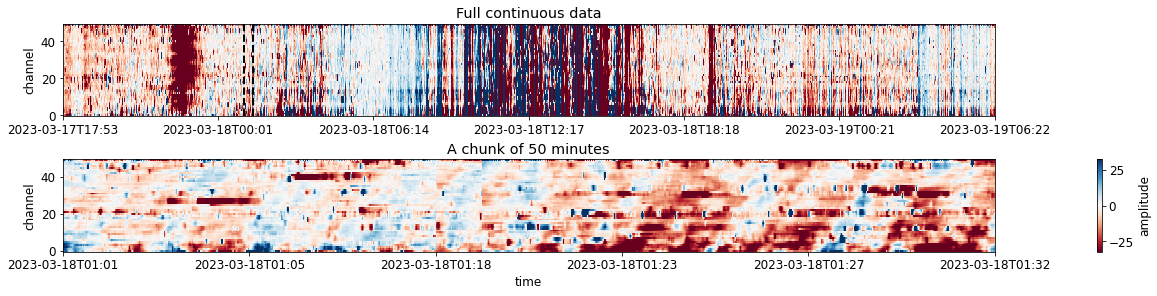

In [4]:
# %% plot data in time-space
fig, ax = plt.subplots(2, 1, figsize=(16, 4), constrained_layout=True)
max_amp = np.percentile(np.fabs(full_time_data), q=80)
cmap=plt.cm.get_cmap('RdBu')

x=np.arange(full_time_data.shape[1])
y=np.arange(full_time_data.shape[0])
ax[0].pcolormesh(x, y, full_time_data, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax[0].set_xticks(np.linspace(0,nsec*f_sample,7))
ax[0].set_xticklabels(utc[(np.linspace(0,nsec/60,7)).astype(int)].astype('datetime64[m]'))
ax[0].set_ylabel('channel'); ax[0].set_title('Full continuous data')
ax[0].axvline(x=st_pt, color='k', lw=2, ls='--')
ax[0].axvline(x=en_pt, color='k', lw=2, ls='--')

x=np.arange(vsp.shape[0])
y=np.arange(vsp.shape[1])
im=ax[1].pcolormesh(x, y, vsp.T, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax[1].set_xticks(np.linspace(0,en_pt-st_pt,6))
ax[1].set_xticklabels(utc[(np.linspace(st_pt,en_pt,6)/f_sample/60).astype(int)].astype('datetime64[m]'))
ax[1].set_ylabel('channel'); ax[1].set_xlabel('time')
ax[1].set_title('A chunk of 50 minutes'); fig.colorbar(im, label='amplitude', ax=ax[1])

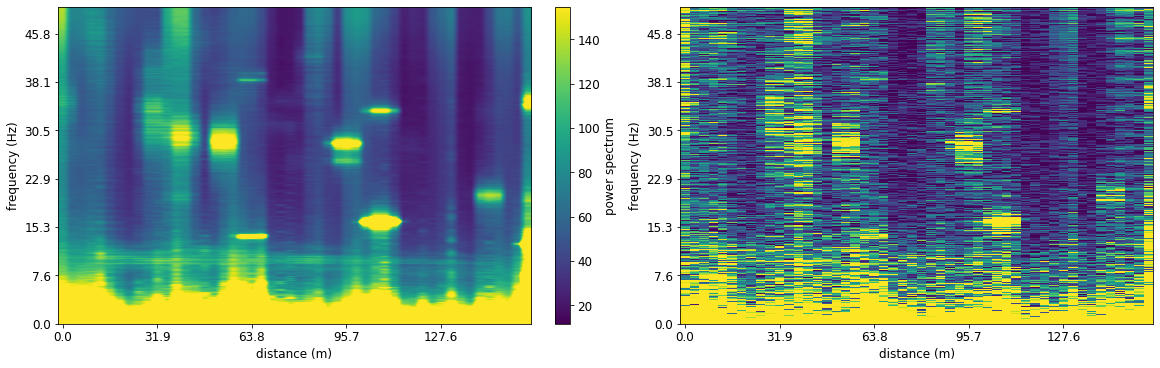

In [7]:
fx2d = np.fft.fft(vsp, n=nf, axis=0)
fx2d = np.fft.fftshift(fx2d, axes=0)

f0 = np.fft.fftshift(np.fft.fftfreq(nf,d=1./f_sample))
df = f0[1]-f0[0]

# plot fft 
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
amps = (np.abs(fx2d)).flatten()
q1=np.percentile(amps, q=5);q2=np.percentile(amps, q=88)
x=np.arange(fx2d.shape[1]);y=np.arange(fx2d.shape[0])

ax[0].imshow((np.abs(fx2d)), aspect = 'auto', vmax=q2, vmin=q1, origin='lower')
im=ax[1].pcolormesh(x,y,(np.abs(fx2d)), shading='auto', vmax=q2, vmin=q1)
plt.colorbar(im, ax=ax[0], label='power spectrum')

for i in [0,1]:
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].set_xticklabels(np.round(np.arange(0, 50, 10)*3.1904762684013206, decimals=1))
    ax[i].set_yticks(np.arange(int(len(f0)/2), len(f0), 10000))
    ax[i].set_yticklabels(np.round(f0[np.arange(int(len(f0)/2), len(f0), 10000)], decimals=1))
    ax[i].set_ylim(nf/2,nf)
    ax[i].set_xlabel('distance (m)')
    ax[i].set_ylabel('frequency (Hz)')


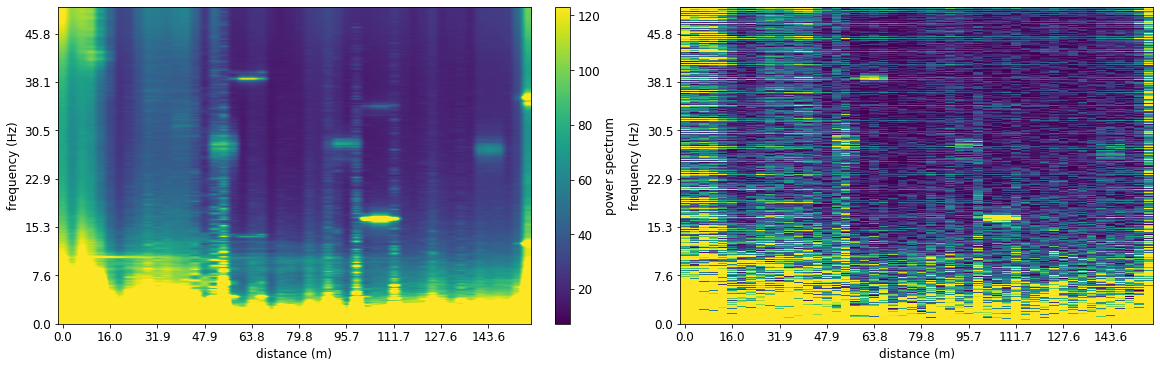

In [13]:
# %% extract another portion of the farm DAS
st_pt=int(800*60*f_sample); en_pt=st_pt+20*60*f_sample
vsp = full_time_data[:, st_pt:en_pt].T

fx2d = np.fft.fft(vsp, n=nf, axis=0)
fx2d = np.fft.fftshift(fx2d, axes=0)

f0 = np.fft.fftshift(np.fft.fftfreq(nf,d=1./f_sample))
df = f0[1]-f0[0]

# plot fft 
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
amps = (np.abs(fx2d)).flatten()
q1=np.percentile(amps, q=5);q2=np.percentile(amps, q=88)
x=np.arange(fx2d.shape[1]);y=np.arange(fx2d.shape[0])

ax[0].imshow((np.abs(fx2d)), aspect = 'auto', vmax=q2, vmin=q1, origin='lower')
im=ax[1].pcolormesh(x,y,(np.abs(fx2d)), shading='auto', vmax=q2, vmin=q1)
plt.colorbar(im, ax=ax[0], label='power spectrum')

for i in [0,1]:
    ax[i].set_xticks(np.arange(0, 50, 5))
    ax[i].set_xticklabels(np.round(np.arange(0, 50, 5)*3.1904762684013206, decimals=1))
    ax[i].set_yticks(np.arange(int(len(f0)/2), len(f0), 10000))
    ax[i].set_yticklabels(np.round(f0[np.arange(int(len(f0)/2), len(f0), 10000)], decimals=1))
    ax[i].set_ylim(nf/2,nf)
    ax[i].set_xlabel('distance (m)')
    ax[i].set_ylabel('frequency (Hz)')


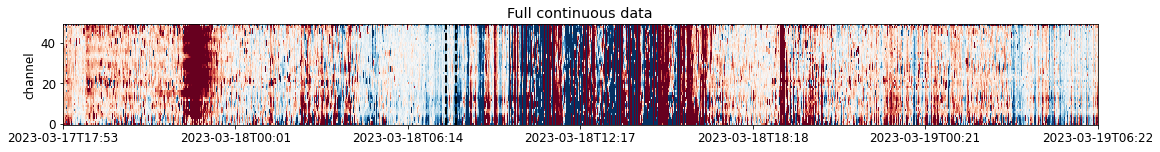

In [16]:
# %% plot data in time-space
fig, ax = plt.subplots(1, 1, figsize=(16, 2), constrained_layout=True)

x=np.arange(full_time_data.shape[1])
y=np.arange(full_time_data.shape[0])
ax.pcolormesh(x, y, full_time_data, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax.set_xticks(np.linspace(0,nsec*f_sample,7))
ax.set_xticklabels(utc[(np.linspace(0,nsec/60,7)).astype(int)].astype('datetime64[m]'))
ax.set_ylabel('channel'); ax.set_title('Full continuous data')
ax.axvline(x=st_pt, color='k', lw=2, ls='--')
ax.axvline(x=en_pt, color='k', lw=2, ls='--')

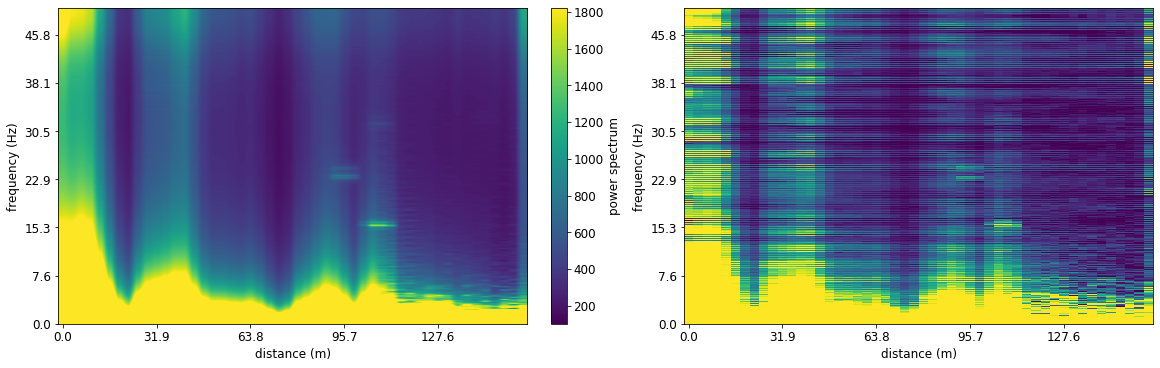

In [17]:
# %% extract another portion of the farm DAS
st_pt=int(1200*60*f_sample); en_pt=st_pt+20*60*f_sample
vsp = full_time_data[:, st_pt:en_pt].T

fx2d = np.fft.fft(vsp, n=nf, axis=0)
fx2d = np.fft.fftshift(fx2d, axes=0)

f0 = np.fft.fftshift(np.fft.fftfreq(nf,d=1./f_sample))
df = f0[1]-f0[0]

# plot fft 
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
amps = (np.abs(fx2d)).flatten()
q1=np.percentile(amps, q=5);q2=np.percentile(amps, q=88)
x=np.arange(fx2d.shape[1]);y=np.arange(fx2d.shape[0])

ax[0].imshow((np.abs(fx2d)), aspect = 'auto', vmax=q2, vmin=q1, origin='lower')
im=ax[1].pcolormesh(x,y,(np.abs(fx2d)), shading='auto', vmax=q2, vmin=q1)
plt.colorbar(im, ax=ax[0], label='power spectrum')

for i in [0,1]:
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].set_xticklabels(np.round(np.arange(0, 50, 10)*3.1904762684013206, decimals=1))
    ax[i].set_yticks(np.arange(int(len(f0)/2), len(f0), 10000))
    ax[i].set_yticklabels(np.round(f0[np.arange(int(len(f0)/2), len(f0), 10000)], decimals=1))
    ax[i].set_ylim(nf/2,nf)
    ax[i].set_xlabel('distance (m)')
    ax[i].set_ylabel('frequency (Hz)')

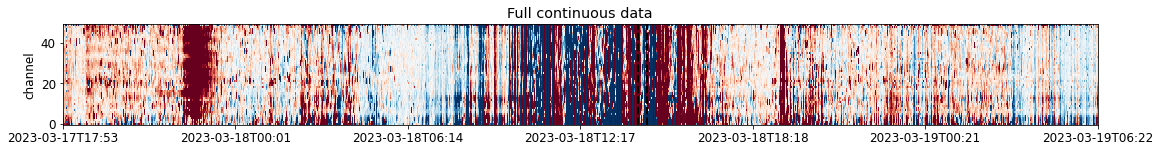

In [18]:
# %% plot data in time-space
fig, ax = plt.subplots(1, 1, figsize=(16, 2), constrained_layout=True)

x=np.arange(full_time_data.shape[1])
y=np.arange(full_time_data.shape[0])
ax.pcolormesh(x, y, full_time_data, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax.set_xticks(np.linspace(0,nsec*f_sample,7))
ax.set_xticklabels(utc[(np.linspace(0,nsec/60,7)).astype(int)].astype('datetime64[m]'))
ax.set_ylabel('channel'); ax.set_title('Full continuous data')
ax.axvline(x=st_pt, color='k', lw=2, ls='--')
ax.axvline(x=en_pt, color='k', lw=2, ls='--')

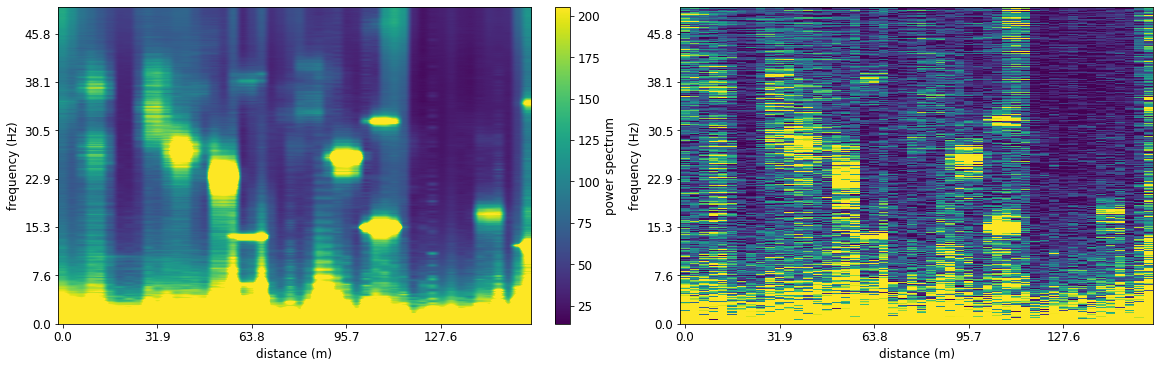

In [19]:
# %% extract another portion of the farm DAS
st_pt=int(1600*60*f_sample); en_pt=st_pt+20*60*f_sample
vsp = full_time_data[:, st_pt:en_pt].T

fx2d = np.fft.fft(vsp, n=nf, axis=0)
fx2d = np.fft.fftshift(fx2d, axes=0)

f0 = np.fft.fftshift(np.fft.fftfreq(nf,d=1./f_sample))
df = f0[1]-f0[0]

# plot fft 
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
amps = (np.abs(fx2d)).flatten()
q1=np.percentile(amps, q=5);q2=np.percentile(amps, q=88)
x=np.arange(fx2d.shape[1]);y=np.arange(fx2d.shape[0])

ax[0].imshow((np.abs(fx2d)), aspect = 'auto', vmax=q2, vmin=q1, origin='lower')
im=ax[1].pcolormesh(x,y,(np.abs(fx2d)), shading='auto', vmax=q2, vmin=q1)
plt.colorbar(im, ax=ax[0], label='power spectrum')

for i in [0,1]:
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].set_xticklabels(np.round(np.arange(0, 50, 10)*3.1904762684013206, decimals=1))
    ax[i].set_yticks(np.arange(int(len(f0)/2), len(f0), 10000))
    ax[i].set_yticklabels(np.round(f0[np.arange(int(len(f0)/2), len(f0), 10000)], decimals=1))
    ax[i].set_ylim(nf/2,nf)
    ax[i].set_xlabel('distance (m)')
    ax[i].set_ylabel('frequency (Hz)')

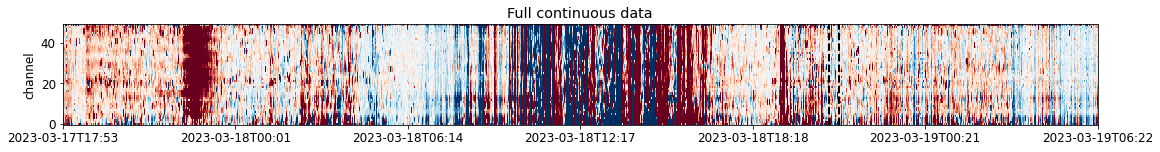

In [20]:
# %% plot data in time-space
fig, ax = plt.subplots(1, 1, figsize=(16, 2), constrained_layout=True)

x=np.arange(full_time_data.shape[1])
y=np.arange(full_time_data.shape[0])
ax.pcolormesh(x, y, full_time_data, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax.set_xticks(np.linspace(0,nsec*f_sample,7))
ax.set_xticklabels(utc[(np.linspace(0,nsec/60,7)).astype(int)].astype('datetime64[m]'))
ax.set_ylabel('channel'); ax.set_title('Full continuous data')
ax.axvline(x=st_pt, color='k', lw=2, ls='--')
ax.axvline(x=en_pt, color='k', lw=2, ls='--')

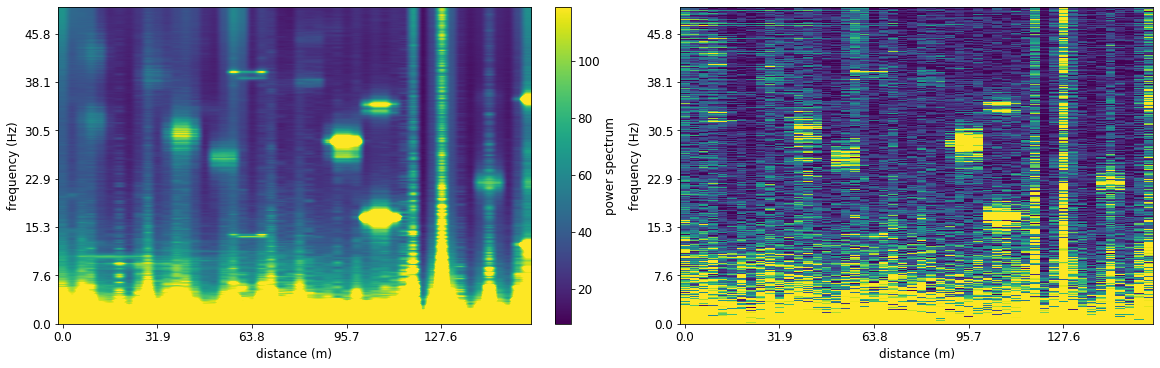

In [23]:
# %% extract another portion of the farm DAS
st_pt=int(2000*60*f_sample); en_pt=st_pt+20*60*f_sample
vsp = full_time_data[:, st_pt:en_pt].T

fx2d = np.fft.fft(vsp, n=nf, axis=0)
fx2d = np.fft.fftshift(fx2d, axes=0)

f0 = np.fft.fftshift(np.fft.fftfreq(nf,d=1./f_sample))
df = f0[1]-f0[0]

# plot fft 
fig, ax = plt.subplots(1, 2, figsize=(16, 5), constrained_layout=True)
amps = (np.abs(fx2d)).flatten()
q1=np.percentile(amps, q=5);q2=np.percentile(amps, q=88)
x=np.arange(fx2d.shape[1]);y=np.arange(fx2d.shape[0])

ax[0].imshow((np.abs(fx2d)), aspect = 'auto', vmax=q2, vmin=q1, origin='lower')
im=ax[1].pcolormesh(x,y,(np.abs(fx2d)), shading='auto', vmax=q2, vmin=q1)
plt.colorbar(im, ax=ax[0], label='power spectrum')

for i in [0,1]:
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].set_xticklabels(np.round(np.arange(0, 50, 10)*3.1904762684013206, decimals=1))
    ax[i].set_yticks(np.arange(int(len(f0)/2), len(f0), 10000))
    ax[i].set_yticklabels(np.round(f0[np.arange(int(len(f0)/2), len(f0), 10000)], decimals=1))
    ax[i].set_ylim(nf/2,nf)
    ax[i].set_xlabel('distance (m)')
    ax[i].set_ylabel('frequency (Hz)')

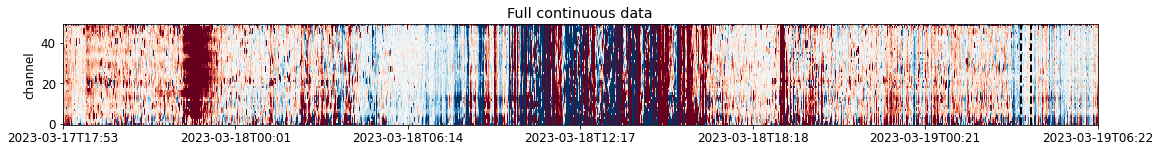

In [22]:
# %% plot data in time-space
fig, ax = plt.subplots(1, 1, figsize=(16, 2), constrained_layout=True)

x=np.arange(full_time_data.shape[1])
y=np.arange(full_time_data.shape[0])
ax.pcolormesh(x, y, full_time_data, shading='auto', vmin=-max_amp, vmax=max_amp, cmap=cmap)
ax.set_xticks(np.linspace(0,nsec*f_sample,7))
ax.set_xticklabels(utc[(np.linspace(0,nsec/60,7)).astype(int)].astype('datetime64[m]'))
ax.set_ylabel('channel'); ax.set_title('Full continuous data')
ax.axvline(x=st_pt, color='k', lw=2, ls='--')
ax.axvline(x=en_pt, color='k', lw=2, ls='--')